In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [41]:
data_1=np.asarray(data[0][:,0])
data_2=np.asarray(data[0][:,1])

plt.scatter(data_2,data_1)

## Creating a random Data Set

In [44]:
N=500
X=np.random.random([N,2])

### Vizualizing data set 

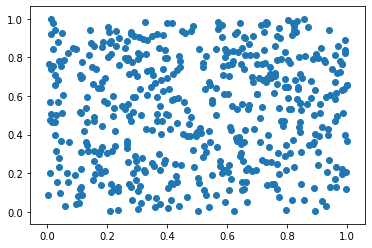

In [46]:
plt.scatter(X[:,0],X[:,1])

### Clearly, the dataset is random, and we do not know how many clusters should it have. Therefore, we must use some sort of method which helps us to choose the number of clusters in Kmeans clustering.In this case we will choose the Elbow Method, and Silhouette Coefficient Method:

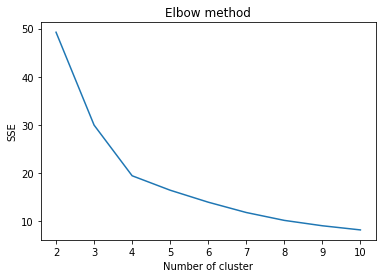

In [75]:
sse={}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    #X["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title("Elbow method")
plt.show()

### From the Elbow method, it can be observed that the number of clusters should be 4

### Now to use Silhouette Coefficient Method

In [86]:
k={}
for i in range(2,11):
    kmeans = KMeans(n_clusters=i).fit(X)
    label1 = kmeans.labels_
    sil_coeff = silhouette_score(X,label1,metric='euclidean')
    k[i]=sil_coeff

kmax=max(k.items(), key=lambda x : x[1])
print("The number of clusters based on the Silhouette coefficient is",kmax[0],"with a value of",kmax[1])

The number of clusters based on the Silhouette coefficient is 4 with a value of 0.42636013644039067


### Just to make sure, we will vizualize the Sillhouette coefficient method

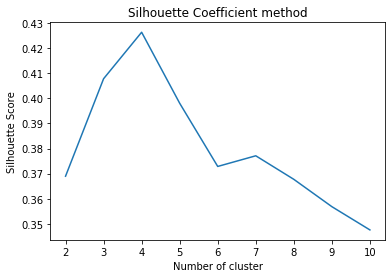

In [90]:
plt.figure()
plt.plot(list(k.keys()), list(k.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Coefficient method")
plt.show()

## Therefore, from both the Elbow and Sillhouette criterion, the number of cluster said data should have is 4.

In [92]:
#Notice that these are the#  clusters obtained from both critiria
kmeansTrue = KMeans(n_clusters=4, max_iter=1000).fit(X)
#clusters centers
print(kmeansTrue.cluster_centers_)

[[0.76290272 0.74823542]
 [0.23509971 0.23160683]
 [0.71775207 0.26806096]
 [0.24248767 0.74057976]]


### Creating image that has 2 subplots. The first one is the cluster data, while the second one the regular data 

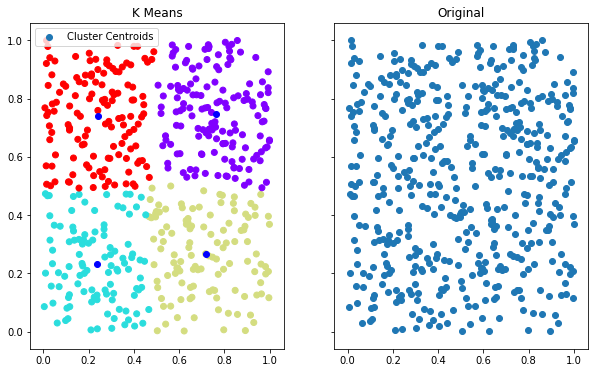

In [125]:
g, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(X[:,0],X[:,1],c=kmeansTrue.labels_,cmap='rainbow')
for i in range(0,4):
    ax1.scatter(kmeansTrue.cluster_centers_[i,0],kmeansTrue.cluster_centers_[i,1],c="b",marker='o')
ax1.legend(["Cluster Centroids"])
ax2.set_title("Original")
ax2.scatter(X[:,0],X[:,1])

### Therefore, we have succesfully applied k means clustering to a data set.